# Import

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv(r'/Users/aaronreese/Desktop/Boat Data Project/2. Data/Prepared Data/boat_data_final.csv')

In [4]:
df.drop(['GBP Price','USD Price','Manufacturer','Condition','Fuel','Length (Meters)','Width (Meters)','Number of views last 7 days','Material','Country Sold In'], axis=1, inplace = True)

In [5]:
df.head()

,Year Built
0,2017.0
1,2020.0
2,NaN
3,2020.0
4,2019.0


In [6]:
df.shape

(9888, 1)

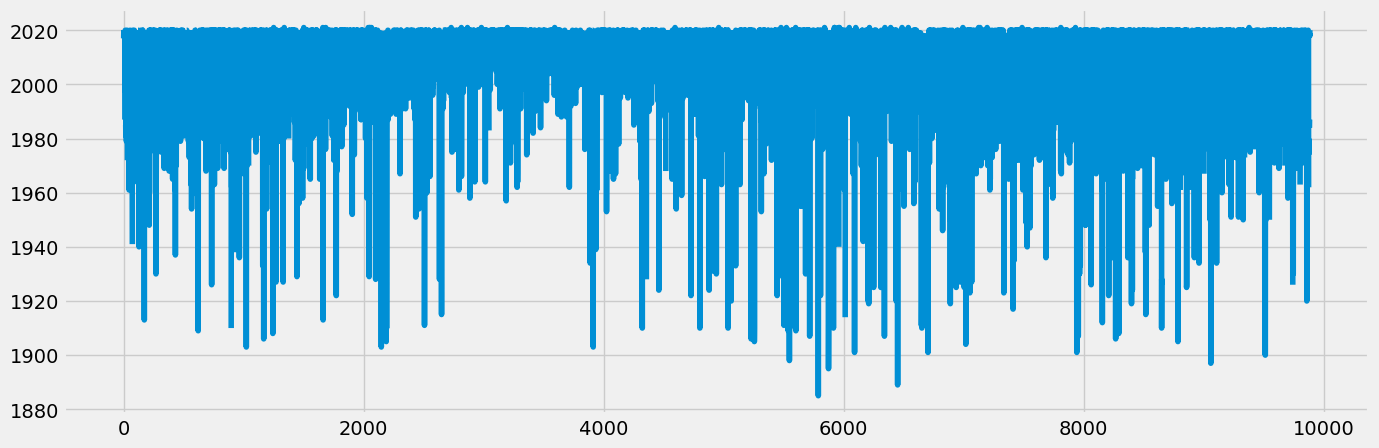

In [7]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df)

# Cleaning Time Series Data

In [8]:
df2 = df.reset_index()

In [9]:
df2.head()

,index,Year Built
0,0,2017.0
1,1,2020.0
2,2,NaN
3,3,2020.0
4,4,2019.0


In [10]:
df2.dtypes

index           int64
Year Built    float64
dtype: object

In [11]:
df2['Year Built'] = df2['Year Built'].astype(str) 

In [12]:
data_sub = df2.loc[(df2['Year Built'] >= '1988.0') & (df2['Year Built'] < '2020.0')]

In [13]:
data_sub.shape

(7052, 2)

In [14]:
data_sub.head()

,index,Year Built
0,0,2017.0
4,4,2019.0
6,6,1999.0
8,8,2019.0
9,9,2018.0


In [15]:
data_sub['Year Built'] = data_sub['Year Built'].astype(str).replace('\.0', '', regex=True)
print (data_sub)

      index Year Built
0         0       2017
4         4       2019
6         6       1999
8         8       2019
9         9       2018
...     ...        ...
9868   9868       1995
9873   9873       2019
9874   9874       2019
9886   9886       2018
9887   9887       2019

[7052 rows x 2 columns]


In [16]:
from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Year Built']) 
data_sub = data_sub.set_index('datetime') 
data_sub.drop(['Year Built'], axis=1, inplace=True) 
data_sub.head()

,index
datetime,
2017-01-01,0
2019-01-01,4
1999-01-01,6
2019-01-01,8
2018-01-01,9


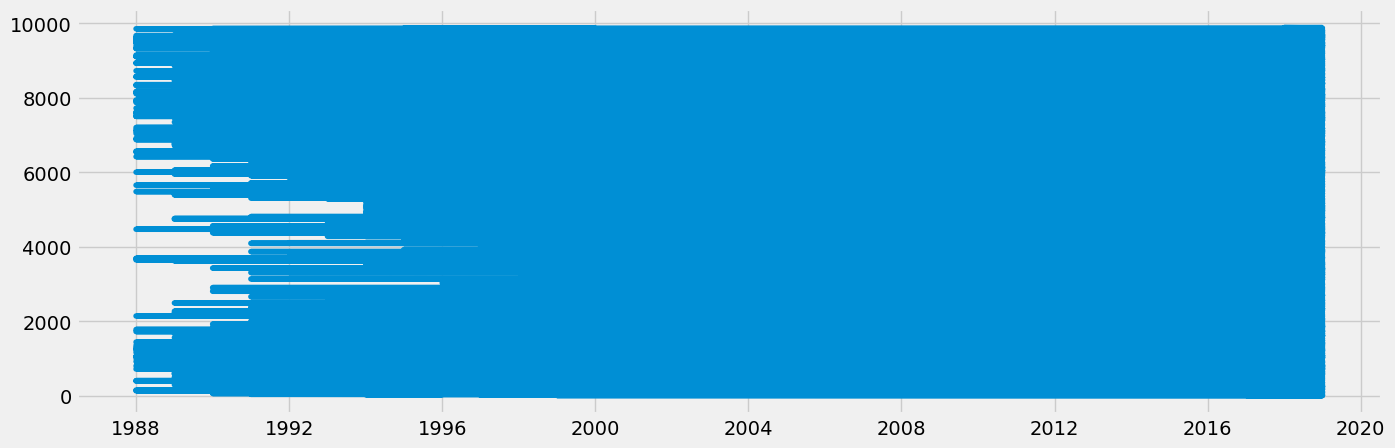

In [17]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [18]:
data_sub.isnull().sum() 

index    0
dtype: int64

In [19]:
dups = data_sub.duplicated()
dups.sum()

0

# Decomposition

In [24]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

In [22]:
decomposition.plot()
plt.show()

NameError: name 'decomposition' is not defined

In [23]:
# The data is not stationary by the infomration potrayed in this graph.

# Dickey-Fuller

In [36]:
from statsmodels.tsa.stattools import adfuller
def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.417013
p-value                          0.574093
Number of Lags Used              7.000000
Number of Observations Used    278.000000
Critical Value (1%)             -3.454094
Critical Value (5%)             -2.871993
Critical Value (10%)            -2.572340
dtype: float64


In [38]:
# Based on the Dickey-Fuller test, we can't reject the null hypothesis.

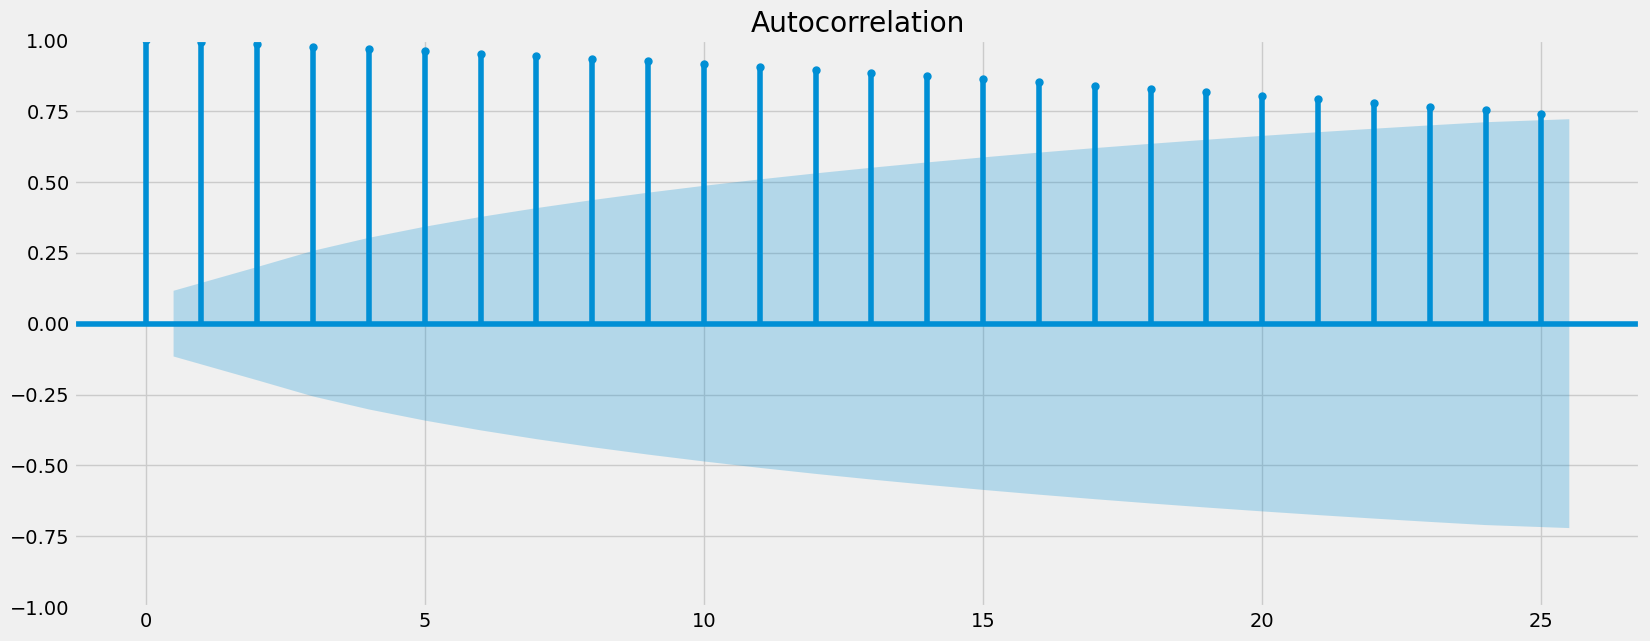

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_sub)
plt.show()

# Stationarizing

In [2]:
from numpy import log

In [3]:
log(data_sub)

NameError: name 'data_sub' is not defined

In [39]:
data_diff = data_sub - data_sub.shift(1)

In [40]:
data_diff.dropna(inplace = True)

In [41]:
data_diff.head()

,Value
datetime,
1949-04-01,0.006463
1949-07-01,0.006497
1949-10-01,0.006551
1950-01-01,0.006618
1950-04-01,0.006684


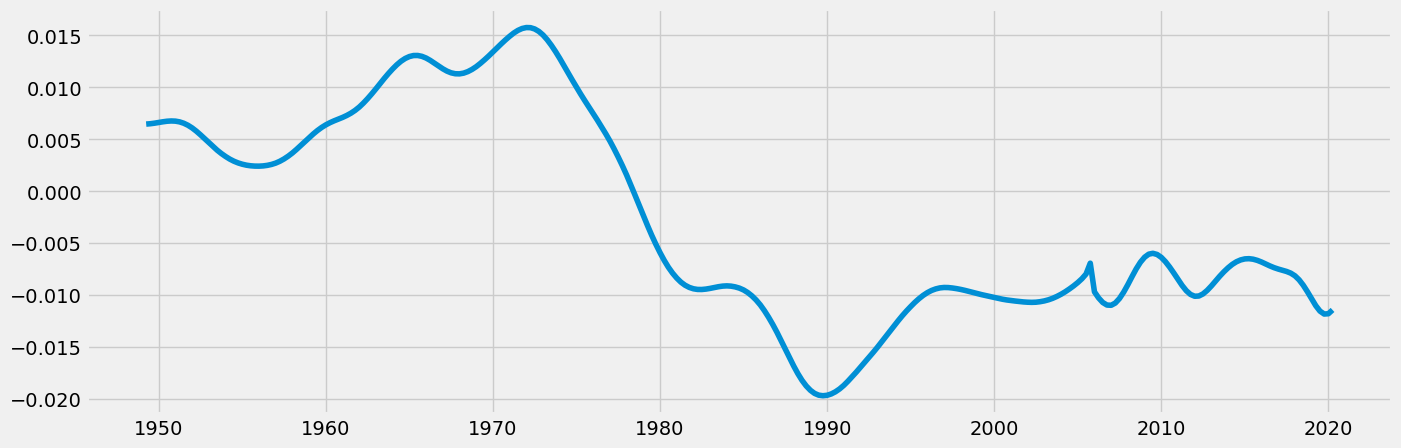

In [42]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [43]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.399327
p-value                          0.582599
Number of Lags Used              6.000000
Number of Observations Used    278.000000
Critical Value (1%)             -3.454094
Critical Value (5%)             -2.871993
Critical Value (10%)            -2.572340
dtype: float64


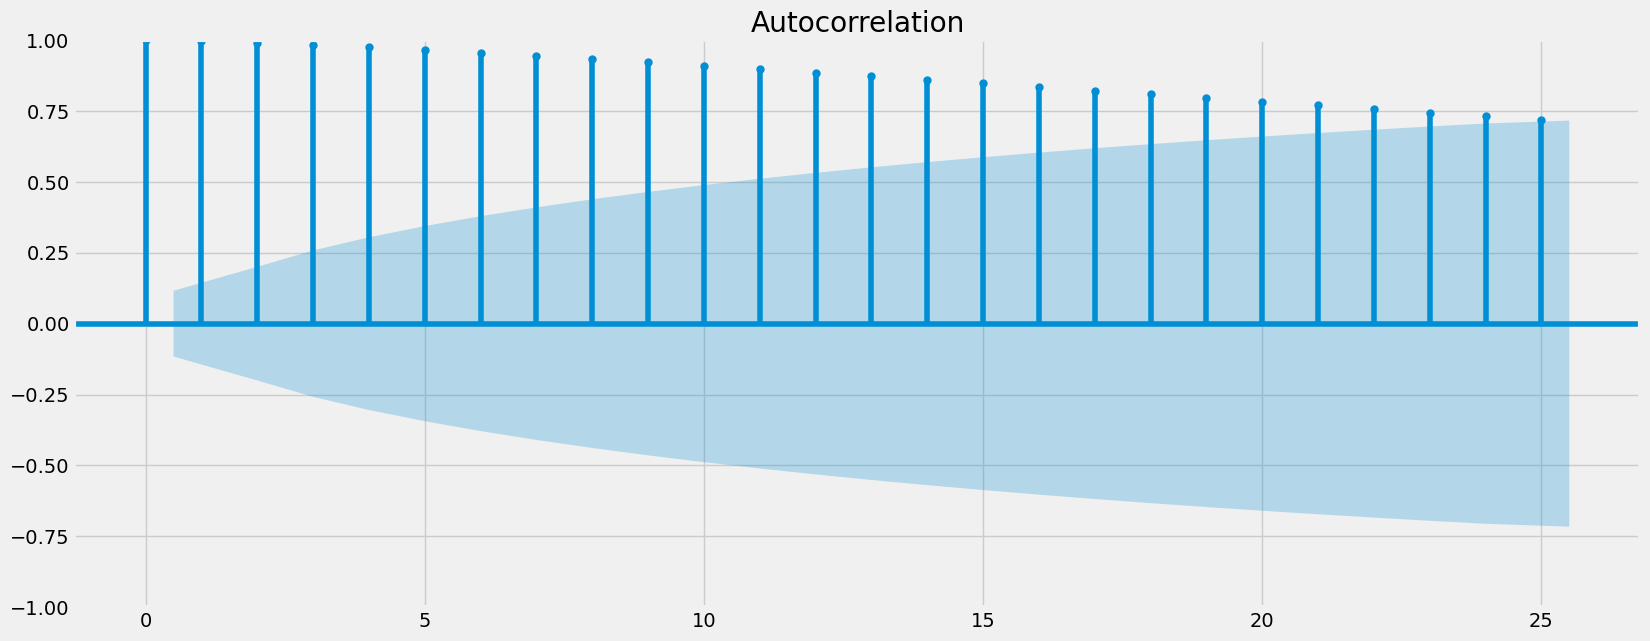

In [45]:
plot_acf(data_diff)
plt.show()